<a href="https://colab.research.google.com/github/cauancalmeida/Desafios_Kaggle/blob/main/Desafio_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/cauancalmeida/Desafios_Kaggle/refs/heads/main/Dados/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/cauancalmeida/Desafios_Kaggle/refs/heads/main/Dados/test.csv')
df_sub = pd.read_csv('https://raw.githubusercontent.com/cauancalmeida/Desafios_Kaggle/refs/heads/main/Dados/gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Limpeza dos dados:

##Verificando os dados nulos:

In [7]:
#quantidade de dados nulos em cada coluna
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
#transformando as colunas nulas
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])

In [9]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Analise exploratoria

<Axes: xlabel='Pclass'>

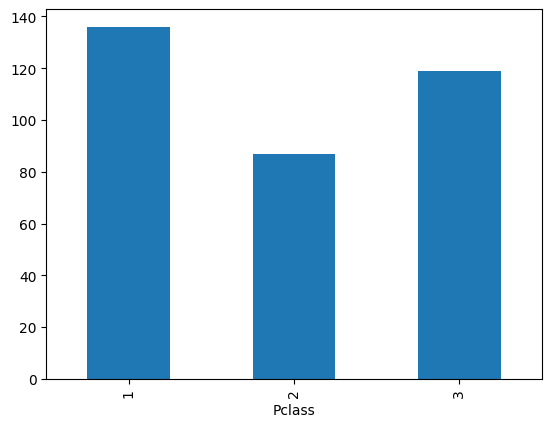

In [27]:
df_train.groupby('Pclass')['Survived'].sum().plot(kind='bar')

A distribuição de classe não ter afetado tanto na variavel survive, os dados estão bem distribuidos entre as classes, mesmo tendo mais pessoas da classe 1 ter sobrevivido.

<Axes: xlabel='Sex'>

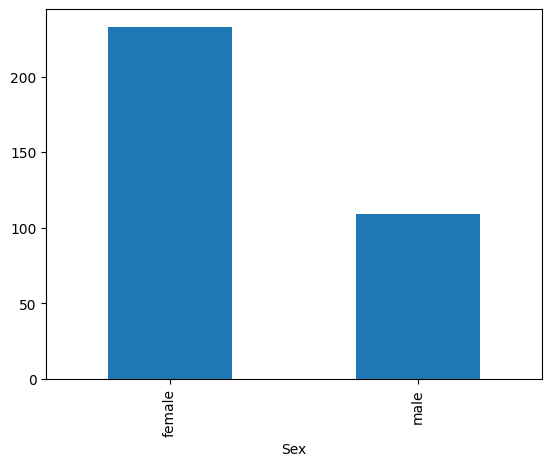

In [28]:
df_train.groupby('Sex')['Survived'].sum().plot(kind='bar')

Comparando os sexos, mostra que os sexo feminino sobreviveu mais que o masculino.

In [29]:
classex = pd.crosstab(df_train['Pclass'], df_train['Sex'])
classex

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


como vimos, mais mulheres sobreviveram, porém, havia mais homens na primeira classe do que mulheres, logo, a classe realmente não parece impactar na sobrevivencia.

<Axes: xlabel='Age', ylabel='Count'>

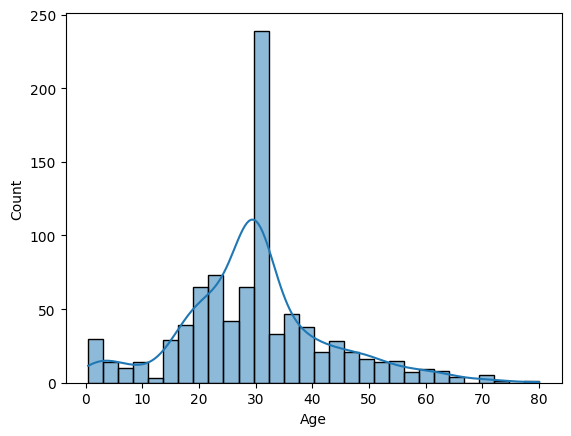

In [68]:
sns.histplot(x='Age', data=df_train,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

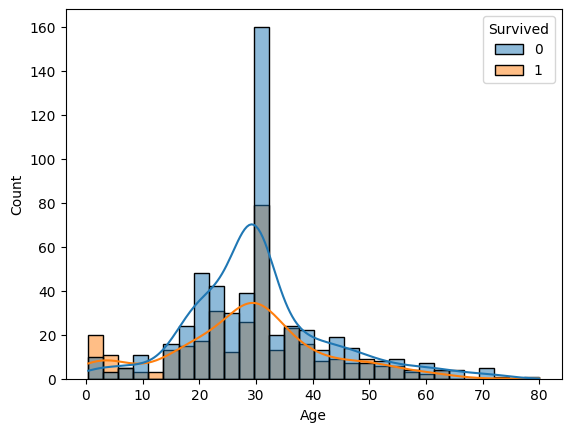

In [62]:
sns.histplot(x='Age', hue='Survived', data=df_train,kde=True)

In [67]:
df_train[(df_train['Age'] >= 18)]['Survived'].value_counts()

,count
Survived,
0,497
1,281


In [65]:
df_train[(df_train['Age'] <= 17)]['Survived'].value_counts()

,count
Survived,
1,61
0,52
